# Mushroom Classification with ANN

<font color = 'purple'>
Content:
    
1. [Introduction](#1)
1. [Read and Encode Data](#2)
1. [Column Description](#3)
1. [Label Encoding](#4)
1. [Train-Test Split](#5)
1. [ANN with Keras](#6)
    * [Hyperparameters in ANN](#7)
    * [Plot](#8)
1. [ANN without Keras](#9)
    * [2-Layer Neural Network](#10)
        * [Size of layers and initializing parameters weights and bias](#11)
        * [Forward propagation](#12)
        * [Loss function and Cost function](#13)
        * [Backward propagation](#14)
        * [Update Parameters](#15)
        * [Prediction with learnt parameters weight and bias](#16)
        * [Create Model](#17)

<a id = '1'></a><br>
# Introduction

#### On this notebook aim is understand how artificial neural network is working, which methods are basically using background ? With this mushroom classification data we will classify mushrooms according to using artificial neural networks without using libraries. After that we will make it with keras.

#### First of all, If you do not informed about logistic regression I highly recomend you to look at logistic regression first. There is a kernel about it written by me. In this notebook there are information about forward-backward propagation, creating models etc. You can find it [here](https://www.kaggle.com/feritebrargrler/heart-disease-classification-logistic-regression).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = '2'></a><br>
# Read and Encode Data

In [ ]:
data = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.info()

#### Whole data is not null.

In [ ]:
data.shape

In [ ]:
for i in data.columns:
    print(i, data[i].unique())

#### Here, i see bunch of unknown words and meaningless letters :) Lets start with know them and make them meanningfull. 

<a id = '3'></a><br>
## Column Description

#### For whom wanted to more know :
#### * class: edible=e, poisonous=p
#### * cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#### * cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#### * cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#### * bruises: bruises=t,no=f
#### * odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#### * gill-attachment: attached=a,descending=d,free=f,notched=n
#### * gill-spacing: close=c,crowded=w,distant=d
#### * gill-size: broad=b,narrow=n
#### * gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
#### * stalk-shape: enlarging=e,tapering=t
#### * stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
#### * stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### * stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#### * stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#### * stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#### * veil-type: partial=p,universal=u
#### * veil-color: brown=n,orange=o,white=w,yellow=y
#### * ring-number: none=n,one=o,two=t
#### * ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
#### * spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
#### * population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
#### * habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
#### * Cap: The cap is the top of the mushroom (and often looks sort of like a small umbrella). Mushroom caps can come in a variety of colors but most often are brown, white, or yellow.
#### * Gills, Pores, or Teeth: These structures appear under the mushroom's cap. They look similar to a fish's gills.
#### * Ring: The ring (sometimes called the annulus) is the remaining structure of the partial veil after the gills have pushed through.
#### * Stem or Stipe: The stem is the tall structure that holds the cap high above the ground.
#### * Volva: The volva is the protective veil that remains after the mushroom sprouted up from the ground. As the fungus grows, it breaks through the volva.
#### * Spores: Microscopic seeds acting as reproductive agents; they are usually released into the air and fall on a substrate to produce a new mushroom.

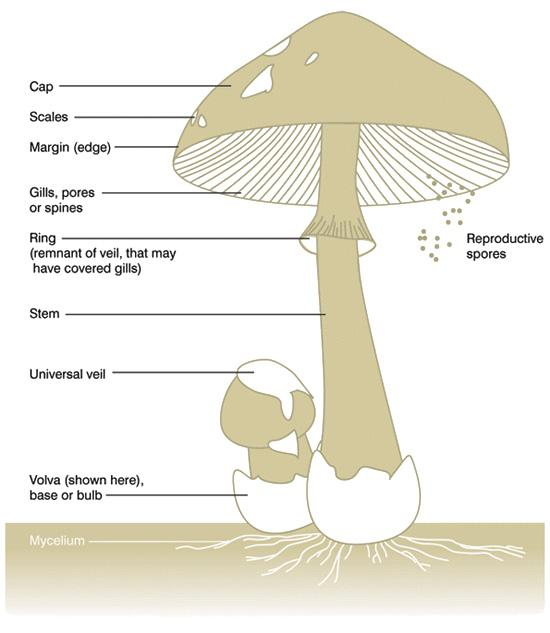

<a id = '4'></a><br>
### Label Encoding

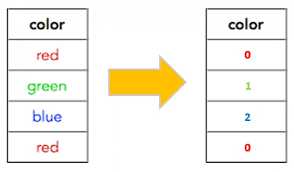

#### Label encoder converts categorical datas to numeric datas which we need to work on.

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [ ]:
data

In [ ]:
sns.countplot(data["class"])
plt.title("Countplot for class")
plt.show()

In [ ]:
data.corr()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<a id = '5'></a><br>
## Train Test Split

In [ ]:
y = data["class"].values
x = data.drop(["class"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

<a id = '6'></a><br>
# ANN with Keras

#### Lets try to classify mushrooms edible or poisonous. First we will make it with keras. 

<a id = '7'></a><br>
### Hyperparameters in ANN

#### There are some hyperparameters that must be chosen intuitively.
* Learning Rate
* Number of Iteration
* Number of Hidden Layers
* Number of Hidden Units
* Activation Functions
* Optimizer

#### *  Learning rate can be say like learning speed. In other words, Incremental step is stepping by the helping of learning rate. There are multiple ways to select a good starting point for the learning rate. A naive approach is to try a few different values and see which one gives you the best loss without sacrificing speed of training. We might start with a large value like 0.1, then try exponentially lower values: 0.01, 0.001, etc
#### * Number iterations is the number of batches of data the algorithm has seen (or simply the number of passes the algorithm has done on the dataset). Epochs is the number of times a learning algorithm sees the complete dataset. Also it can be say like that : how many times the model will make forward-backward propagation, compute cost, predict values (You will see in without keras part)
#### * Number of hidden units changeble from kind of problem. If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work. If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used. But regarding to problem this amount can be very big.
#### * Number of hidden units are like number of hidden layers. If you have too few hidden units, you will get high training error and high generalization error due to underfitting and high statistical bias. If you have too many hidden units, you may get low training error but still have high generalization error due to overfitting and high variance.
#### * An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network. The purpose of the activation function is to introduce non-linearity into the output of a neuron. We know, neural network has neurons that work in correspondence of weight, bias and their respective activation function. Most common activation functions are sigmoid, tanh (hiperbolic tangent), relu, swish. These are changeble according to the problem. So we call them hyperparameters. But for general i can say that sigmoid is not using on hidden layers. If it would be used, it used in output layer. For hidden units most common one is relu.
#### * Optimizers are like activation functions. Some of them are stochastic gradient desctent, RMSprop,Adagrad, momentum, adam. Each of them have advantages and disadvantages. It would be nice if you know what are these advantages and disadvantages. It would make sense to use the one that gives the optimum rate or accuracy at the optimum time. I can say that most common one is adam. Some advantages of Adam is that relatively low memory requirements and usually works well even with little tuning of hyperparameters

#### Some activation functions : 
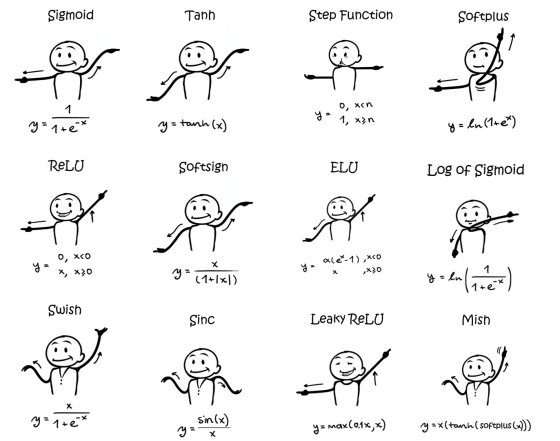

#### I leave a [gif link](https://www.google.com/search?q=woptimization+deep+learning+gif&tbm=isch&ved=2ahUKEwi88o2AidzxAhXIwKQKHRnZCbQQ2-cCegQIABAA&oq=woptimization+deep+learning+gif&gs_lcp=CgNpbWcQA1D8lAFYxZsBYLmcAWgAcAB4AIABbIgBvgKSAQMwLjOYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=MnHrYLyRKciBkwWZsqegCw&bih=610&biw=1366#imgrc=nkJHfKXTjfXwGM&imgdii=ZGctRMduE6Oc7M) like this so that aim of the optimization methods can be visualized in your mind.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # empty neural network
from keras.layers import Dense # layer constitution

def build_classifier():
    classifier = Sequential() # initialize neural network architecture
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu", input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu")) #kernel_initializer: to initialize weights
    classifier.add(Dense(units = 1, kernel_initializer="uniform", activation="sigmoid")) #output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs=70, batch_size=10)
# epoch = number of iteration, batch size : efers to the number of training examples utilized in one iteration.
accurisies = cross_val_score(estimator=classifier, X=x_train, y = y_train, cv = 2)
mean = accurisies.mean()
variance = accurisies.std()
print("Accuracy mean : ", str(mean))
print("Accuracy variance : ", str(variance))

<a id = '8'></a><br>
## Plot

In [ ]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

<a id = '9'></a><br>
# ANN without Keras

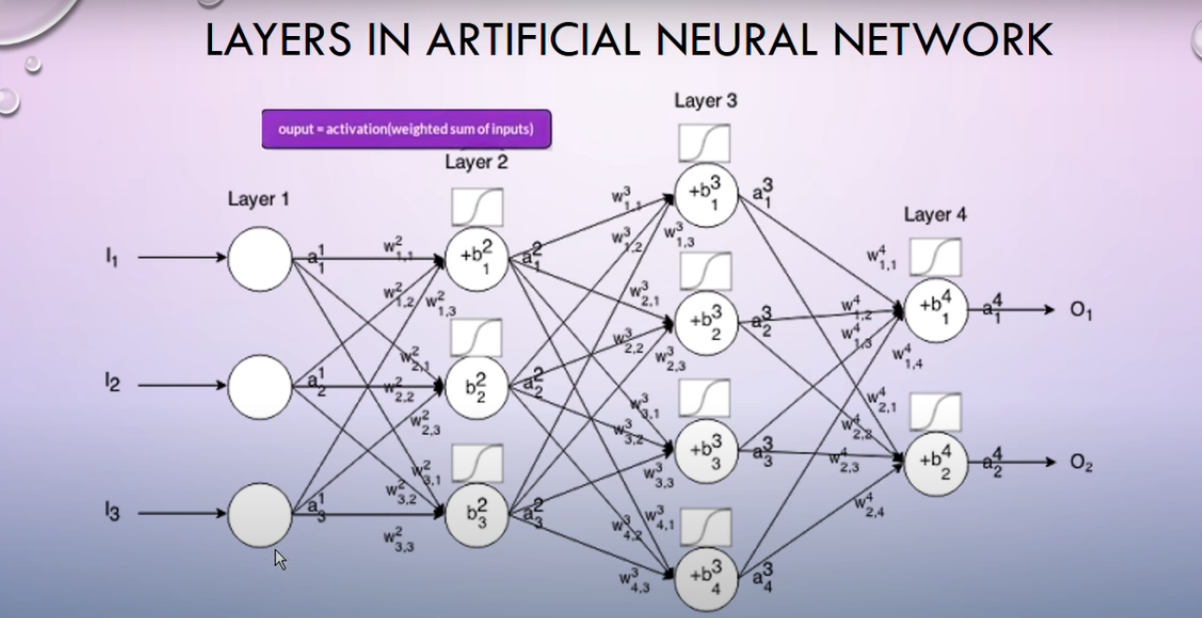

#### *  ANN can be thought as multiple recurring logistic regression.
#### * In logistic regression there were input and output layers. But in ANN there are input, hidden(at least 1) and output layers.
#### * Hidden layers(nodes) do not see inputs. For this reason they called as hidden layers.
#### * Increasing on the number of layers, increases nonlinearity. This increases exploration. However, increasing number of layers is not increase accuracy all the time.
#### * Hidden units are the number of neurons or each node in a layer.
#### * In Deep Learning there are concept as feature engineering. This changed with model architecture engineering. Because, deep learning models decide which feature important or non important. (Weights)
#### * In ANN input layers are not counted as layers. If someone says 2 layers network, you must understand that there are input layer, 1 hidden  and output layer.
#### * First part (without keras), we will constitute 2 layers network.
#### * Do not forget the equation : z = b + w1.x1 + w2.x2 + .... + wn.xn
#### * Activation(z) will be our y_pred

<a id = '10'></a><br>
## 2-Layer Neural Network

#### Path will be like that :
* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model


In [ ]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.reshape(-1,1).T
y_test = y_test.reshape(-1,1).T

<a id = '11'></a><br>
## Size of Layers and Initializing Parameters Weights and Bias

#### Weights and bias will be chosen randomly. The simplest way to initialize weights and biases is to set those to small uniform random values which works well for neural networks with a single hidden layer.

In [ ]:
def initialize_parameters_and_layer_sizes_ANN(x_train, y_train):
    parameters = {"weight1": np.random.randn(5,x_train.shape[0]) * 0.1, #5 represents for 5 nodes
                  "bias1": np.zeros((5,1)),
                  "weight2": np.random.randn(y_train.shape[0],5) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

#### The arranements on the numbers are like that becasue of the matrix multiplication.

<a id = '12'></a><br>
## Forward Propagation

#### Forward propagation is almost same with logistic regression. The only difference is we use tanh function and we make all process twice. For whom asking what is the difference between sigmoid and tanh function : Sigmoid returns values 0 to 1. Tanh returns values -1 to 1

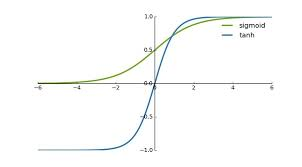

In [ ]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def forward_propagation_ANN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) + parameters["bias1"] # z = wx+b
    y_head1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],y_head1) + parameters["bias2"]
    y_head2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "y_head1": y_head1,
             "Z2": Z2,
             "y_head2": y_head2}
    
    return y_head2, cache

#### For this stage, as it was in logistic regression z1 is calculated with fimiliar expression z = wx+b, after the it putted into an activation function tanh. For other node it replied. The only difference sigmoid is used. Lastly, probabilistic number from sigmoid is our output. 

<a id = '13'></a><br>
## Loss and Cost Function

* #### Cost function helps us reach the optimal solution. The cost function is the technique of evaluating “the performance of our algorithm/model”. It takes both predicted outputs by the model and actual outputs and calculates how much wrong the model was in its prediction. 
* #### Cost function is sumation of each inputs loss.
* #### After forward propagation, our model would be contrast the predicted values and true values. After each forward propagation we will get new cost values.
* #### In this model we will use cross entropy loss.

#### Cross Entropy Loss: 
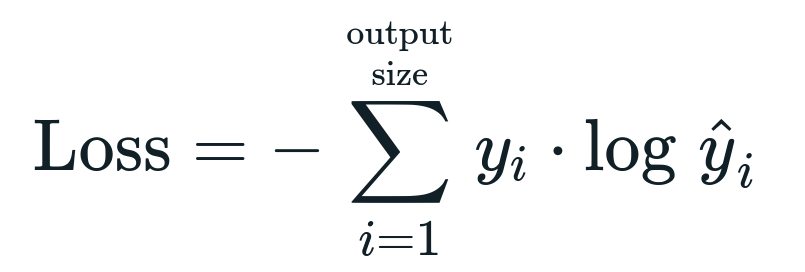

In [ ]:
def compute_cost_ANN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y) # Y real y values
    cost = -np.sum(logprobs)/Y.shape[1] # for normalization
    return cost

<a id = '14'></a><br>
## Backward Propagation

#### Backward propagation is all about derivative. Basically in neural networks, you forward propagate to get the output and compare it with the real value to get the error. Now, to minimize the error, you propagate backwards by finding the derivative of error with respect to each weight and then subtracting this value from the weight value. The purpose of this calculations is optimize the algorithm.

In [ ]:
def backward_propagation_ANN(parameters, cache, X, Y):

    dZ2 = cache["y_head2"]-Y # derivative with respect to y_head2
    dW2 = np.dot(dZ2,cache["y_head1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1] #keepdims=True writes results in to array
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["y_head1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id = '15'></a><br>
## Update Parameters

#### This is updating equations. By taking derivative of cost function according to weights and biases. Then multiply it with α learning rate. Step by step model will be updated by this method. Learning rate can be say like learning speed. In other words, Incremental step is stepping by the helping of learning rate.

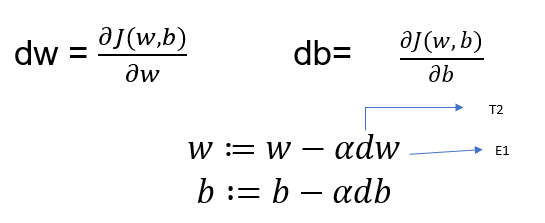

In [ ]:
def update_parameters_ANN(parameters, grads, learning_rate = 0.1):
    parameters = {"weight1": parameters["weight1"]-learning_rate * grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate * grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate * grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate * grads["dbias2"]}
    
    return parameters

<a id = '16'></a><br>
## Prediction with Learnt Parameters

In [ ]:
def predict_ANN(parameters,x_test):
    # x_test is a input for forward propagation
    y_head2, cache = forward_propagation_ANN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(y_head2.shape[1]):
        if y_head2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id = '17'></a><br>
## Create Model

In [ ]:
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_ANN(x_train, y_train)

    for i in range(0, num_iterations): #it will make forward backward prop. , compute cost, update parameters by the amount of number of iterations
         # Forward Propagation 
        y_head2, cache = forward_propagation_ANN(x_train,parameters)
        
        # Compute Cost 
        cost = compute_cost_ANN(y_head2, y_train, parameters)
        
         # Backward Propagation 
        grads = backward_propagation_ANN(parameters, cache, x_train, y_train)
        
         # Update Parameters
        parameters = update_parameters_ANN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    plt.figure(figsize=(15,12))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # Prediction
    y_prediction_test = predict_ANN(parameters,x_test)
    y_prediction_train = predict_ANN(parameters,x_train)

    # Print train/test Errors
    print("Train Accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("Test Accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=7000)